In [1]:
crdt_crd<-read.csv("D:\\R_TXT_MINE_DATA\\creditcard.csv",header = TRUE,
                   stringsAsFactors = FALSE,
                   strip.white = TRUE ,
                   sep = ',')

#checking overall dataset and coverting 'class' as factor variables 
str(crdt_crd)
crdt_crd$Class = as.factor(crdt_crd$Class)
str(crdt_crd$Class)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [2]:
#install.packages("partykit")
library(party)
library(partykit)
cc_dsn_tree <- ctree(Class ~V21+V22+V14+V10+V4, data=crdt_crd)
cc_dsn_tree 

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: libcoin

Attaching package: 'partykit'

The following objects are masked from 'package:party':

    cforest, ctree, ctree_control, edge_simple, mob, mob_control,
    node_barplot, node_bivplot, node_boxplot, node_inner, node_surv,
    node_terminal, varimp




Model formula:
Class ~ V21 + V22 + V14 + V10 + V4

Fitted party:
[1] root
|   [2] V14 <= -2.79978
|   |   [3] V14 <= -5.84353
|   |   |   [4] V10 <= -1.88484: 1 (n = 331, err = 14.2%)
|   |   |   [5] V10 > -1.88484
|   |   |   |   [6] V21 <= 0.53098: 0 (n = 80, err = 1.2%)
|   |   |   |   [7] V21 > 0.53098: 1 (n = 7, err = 14.3%)
|   |   [8] V14 > -5.84353
|   |   |   [9] V14 <= -4.21176
|   |   |   |   [10] V10 <= -1.87964
|   |   |   |   |   [11] V4 <= 1.83572: 1 (n = 29, err = 41.4%)
|   |   |   |   |   [12] V4 > 1.83572: 1 (n = 62, err = 4.8%)
|   |   |   |   [13] V10 > -1.87964
|   |   |   |   |   [14] V4 <= 4.4169: 0 (n = 243, err = 0.4%)
|   |   |   |   |   [15] V4 > 4.4169: 0 (n = 22, err = 22.7%)
|   |   |   [16] V14 > -4.21176
|   |   |   |   [17] V10 <= -2.89261
|   |   |   |   |   [18] V22 <= 0.78357: 1 (n = 18, err = 44.4%)
|   |   |   |   |   [19] V22 > 0.78357: 1 (n = 16, err = 0.0%)
|   |   |   |   [20] V10 > -2.89261
|   |   |   |   |   [21] V4 <= 1.95162
|   |   |   

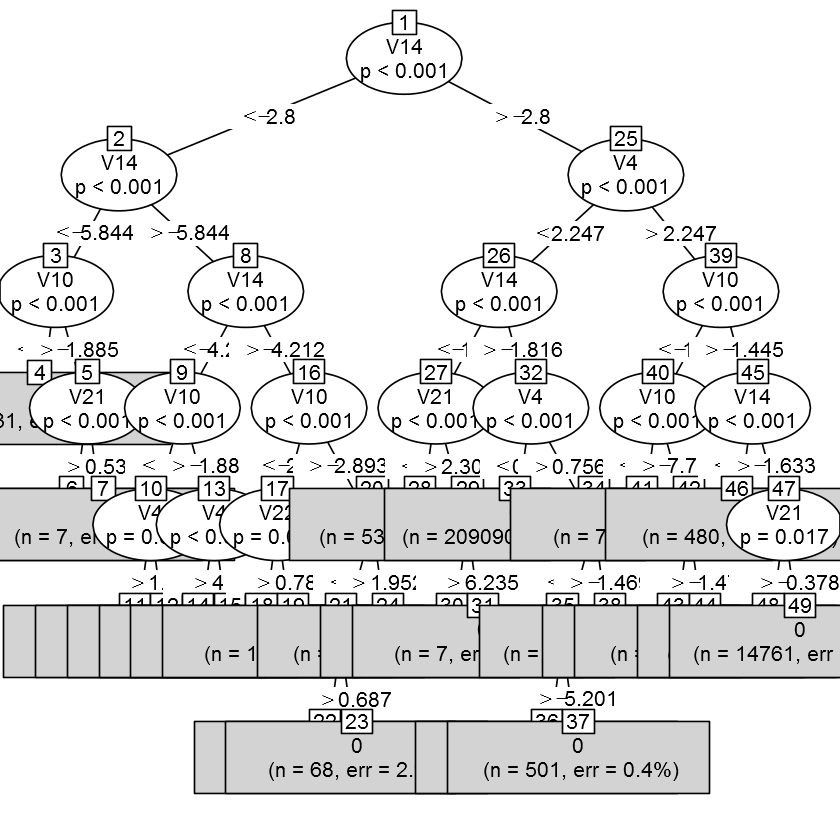

In [3]:
plot(as.simpleparty(cc_dsn_tree ), type="simple")

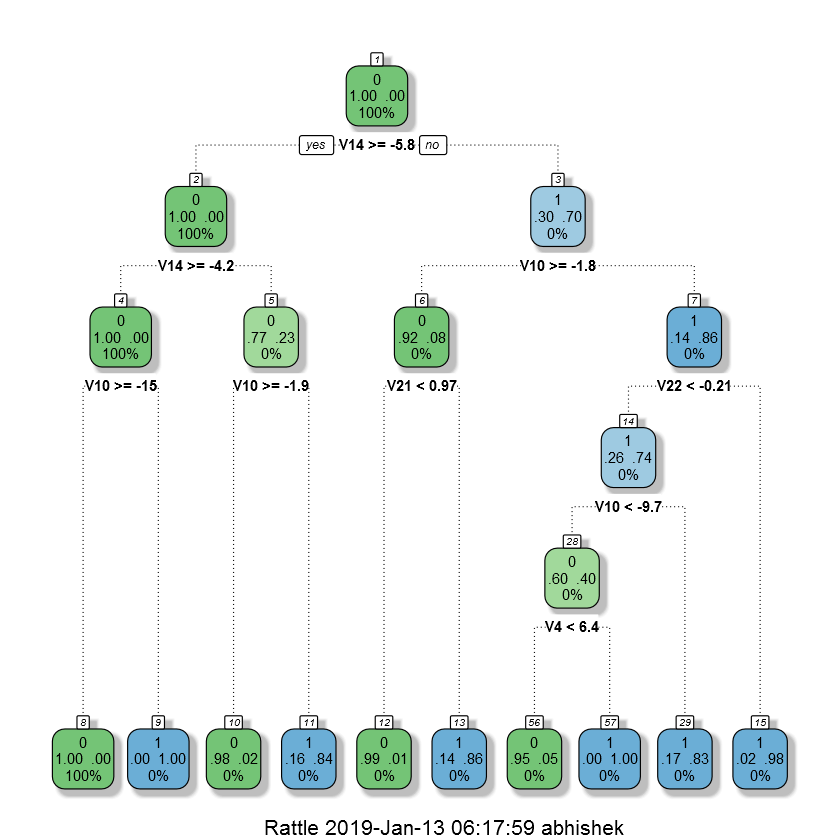

In [5]:
library(rpart)
library(rattle)

cc_dec_tree <- rpart(Class ~V21+V22+V14+V10+V4, data=crdt_crd, method="class")
fancyRpartPlot(cc_dec_tree)